In [1]:
# 폰트 다운로드 (런타임 재부팅 해야함)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (4,164 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and di

In [2]:
# plot 라이브러리
import matplotlib
import matplotlib.pyplot as plt
# 경고 메시지 무시
import warnings
# 실행결과 경고메시지 출력 제외
warnings.filterwarnings('ignore')
# 글꼴 설정
plt.rc('font', family='NanumBarunGothic') 


ALL => 개 개  고양이 고양이 고양이 고양이 고양이 고양이 고양이

* 예를들면 극단적으로 데이터가 개는 앞쪽에 쏠리고 고양이는 뒷쪽에 쏠릴경우
  학습 할 수록 개를 학습한 내용이 희미해지고 고양이에 쏠리게됨
  

In [4]:
# 데이터 split하기 위한 도구
from sklearn.model_selection import train_test_split

# 데이터 고차원 화 
from sklearn.preprocessing import PolynomialFeatures

# 데이터 rescaling
from sklearn.preprocessing import StandardScaler

# 사이킷런 전처리 파이프라인 만들기 위해
from sklearn.pipeline import Pipeline

# 행렬 연산 라이브러리
import numpy as np

# 사이킷런의 linear model 중 stochastic gradient descent 
from sklearn.linear_model import SGDRegressor

# 사이킷런의 loss function 중 하나인 mean squared error 모듈 (MSE)
from sklearn.metrics import mean_squared_error

# 시스템 접근 모듈
import os

# random 기준
np.random.seed(42)

# 그림을 저장할 폴더
PROJECT_ROOT_DIR = '.'

# 100개 샘플 예정
m=100

# 100개의 샘플 사용 데이터
X = 6 * np.random.rand(m, 1)-3

# 100개의 샘플 사용 데이터의 정답값
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

# train set, validation set                     # ravel 다차원을 1차원으로,
                                                # test_size = validation set 50%, random_state suffling 기준
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state =10)

print(len(X_train))
print(len(X_val))
print(len(y_train))
print(len(y_val))

25
25
25


In [ ]:
# 전처리 파이프라인 polynomial Features의 차수는 2
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 2, include_bias=False)),
    ("std_scaler", StandardScaler()),
])

# X로 fitting 한 다음에 변환까지
X_train_poly_scaled = poly_scaler.fit_transform(X_train)

# 이미 X_train으로 poly_scaler 를 fitting 해서 변환만 해줌 / 데이터가 상대적으로 많은 X_train으로 fitting 시킴
X_val_poly_scaled = poly_scaler.transform(X_val)


# SGDRegressor 모델 정의
# penalty: {'l2', 'l1', 'elasticnet'}, 기본값='l2' 사용할 페널티(정규화 용어라고도 함)입니다. 선형 SVM 모델의 표준 정규화 장치인 'l2'가 기본값입니다. 'l1' 및 'elasticnet'은 'l2'로 달성할 수 없는 모델(기능 선택)에 희소성을 가져올 수 있습니다.
# eta0 float, 기본값=0.01 초기 학습률입니다. 기본값은 0.01입니다.
# warm_start의 default는 False임. 이는 .fit을 실행할 때, 이전에 업데이트된 weight(coefficient)를 초기화하고 다시 fitting한다는 것을 의미한다. 반대로 True는 이전 호출에 사용했던 solution을 재사용 할지 여부 결정
# learning_rate="constant" : Learning Rate로 지정한 상수값을 계속 사용하는 것을 나타냅니다.
sgd_reg = SGDRegressor(max_iter=1,                 # 횟수 설정, 여기에 500을 넣지 않는 이유는 max_iter가 없는 모델들도 있어서 일단 체험
                       penalty=None,               #
                       eta0=0.0005,                # learning rate 수치
                       warm_start=True,            # ★
                       learning_rate="constant",   # 
                       random_state=42)            #

# 학습 횟수
n_epochs = 500

# 학습 오차와 validation 오차를 담을 리스트 그릇 선언
train_errors, val_errors = [], []

# 학습 반복 (500번)
for epoch in range(n_epochs):
  # fitting, polynomial 시킨거랑 정답값으로 fitting,
  sgd_reg.fit(X_train_poly_scaled, y_train)
  
  # fitting된 모델에 train X와 validation X 넣어서 각각 예측값 도출                  # 반복문 루프마다 fitting 시키고, 곧 바로 predict를 시키고                          //  over fitting
  y_train_predict = sgd_reg.predict(X_train_poly_scaled)                             # MSE를 만들고, 리스트에 넣어서 몇번째 반복학습할때 에러가 제일 적은지 확인
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)

  # MSE 구한 후 리스트에 각각 담기
  train_errors.append(mean_squared_error(y_train, y_train_predict))
  val_errors.append(mean_squared_error(y_val, y_val_predict))

# argmin에서 몇번째에 val error가 낮냐? 즉 몇번째가 몇번째 epoch냐
best_epoch = np.argmin(val_errors)

# best epoch에서 val_error를 찾고, 그 값은 MSE라서 RMSE로 구함.
best_val_rmse = np.sqrt(val_errors[best_epoch])



In [ ]:
from sklearn.base import clone

sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)


minimum_val_error = float("inf")

best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 이어서 학습합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        count=0
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
    else: # 만약에 minimum error 가 연속으로 뜬다면 break 시킬거임
      count += 1
      if count==5:
        break         # early stopping (조기종료)

In [ ]:
# 전처리 파이프라인 polynomial Features의 차수는 90
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

# X로 fitting 한다음에 변환까지
X_train_poly_scaled = poly_scaler.fit_transform(X_train)

# 이미 X_train으로 poly_scaler를 fitting해서 변환만 해줌.
X_val_poly_scaled = poly_scaler.transform(X_val)

# SGDRegressor 모델 정의


# penalty: {'l2', 'l1', 'elasticnet'}, 기본값='l2' 사용할 페널티(정규화 용어라고도 함)입니다. 선형 SVM 모델의 표준 정규화 장치인 'l2'가 기본값입니다. 'l1' 및 'elasticnet'은 'l2'로 달성할 수 없는 모델(기능 선택)에 희소성을 가져올 수 있습니다.
# eta0 float, 기본값=0.01 초기 학습률입니다. 기본값은 0.01입니다.
# warm_start의 default는 False임. 이는 .fit을 실행할 때, 이전에 업데이트된 weight(coefficient)를 초기화하고 다시 fitting한다는 것을 의미한다. 반대로 True는 이전 호출에 사용했던 solution을 재사용 할지 여부 결정
# learning_rate="constant" : Learning Rate로 지정한 상수값을 계속 사용하는 것을 나타냅니다.
sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

# 학습 횟수
n_epochs = 500

# 학습오차와 validation 오차 담을 리스트 그릇
train_errors, val_errors = [], []

# 학습 반복
for epoch in range(n_epochs):
    # fitting, polynomial 시킨거랑 정답값으로 fitting.
    sgd_reg.fit(X_train_poly_scaled, y_train)

    # fitting된 모델에 train X와 validation X 넣어서 각각 예측값 도출
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)

    # MSE 구한 후 리스트에 각각 담기
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

# argmin에서 몇번째에 val error가 낮냐? 즉 몇번째가 몇번째 epoch냐
best_epoch = np.argmin(val_errors)

# best epoch에서 val_error를 찾고, 그 값은 MSE라서 RMSE로 구함.
best_val_rmse = np.sqrt(val_errors[best_epoch])

# plot에서 설정할 값들.
# xytext : 텍스트 위치 
# xy : 화살표 위치
# ha : horizontal alignment
# arrowprops : 화살표 속성들

plt.annotate('최선의 모델',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # 그래프를 더 보기 좋게 만들기 위해
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)

# val_errors와 train_errors의 RMSE
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="훈련 세트")

# 각 화살표 네이밍
plt.legend(loc="upper right", fontsize=14)

# xlabel
plt.xlabel("에포크", fontsize=14)

# ylabel
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()



In [5]:
# 사이킷런 라이브러리에서 공급하는 iris 데이터
# 총 5개의 컬럼
# sepal length in cm
# sepal width in cm
# petal length in cm
# petal width in cm
# label

from sklearn import datasets
iris = datasets.load_iris()

In [6]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X, y)

# regression의 방식을 이해하고 나중에 soft voting때 이 내용 이해가 필요

LogisticRegression(random_state=42, solver='liblinear')

In [8]:
X = iris["data"][:, 3:]  # 꽃잎 넓이 1 개만.

# 정답 만들기, target 2부분을 1로 만드는 부분
y = (iris["target"] == 2).astype(np.int)  # Iris-Virginica이면 1 아니면 0

In [9]:
iris["target"] == 2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
# 데이터 생성
# 0~3 사이에 1000개
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) #하나의 데이터에 1000개의 행이 있는걸로 인식
# np.linespace(0,3,1000).reshape(-1,1) #reshape해줌, reshape은 차원, 즉 1차원에서 2차원으로 배열로 바꿔준것

# 모델로 예측
y_proba = log_reg.predict_proba(X_new) 

# 0.5 기준으로 decision boundary 구함. 그리고 그 X 값은 무엇인지? (linear하게 뽑아서 첫번째 값을 바운더리 데이터로 생각함.)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0] # 0.5 보다 큰 기준으로 뽑아옴
decision_boundary

In [11]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# 총 5개의 컬럼
# sepal length in cm 꽃받침부분
# sepal width in cm 꽃받침부분
# petal length in cm 꽃잎 
# petal width in cm 꽃잎
# label

iris = datasets.load_iris()
X = iris["data"][:, (2,3)]
# 2를 제외하고 라는 뜻
y = (iris["target"] == 2).astype(np.float64)

print(X)

# 사용방법과 특성을 익히자


[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [15]:
svm_clf = Pipeline([
                  # 데이터 rescaling
    ("scaler", StandardScaler()),
                  # Linear Support vector Machine Classifier : SVC, 힌지 loss
    ("linear_svc",LinearSVC(C=1, loss="hinge", random_state=42)), # C=1 하이퍼 파라미터, 100으로하면 더 세게 하드마진
  ])

# SVM 훈련
svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [16]:
# 분류 예측
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [17]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# SVC에서 kernel을 linear로 해도 되지만, LinearSVC가 최적화 되어있고 더 빠르다

polynomial_svm_clf = Pipeline([ # recaling만 하지말고, PolynomialFeatures도 넣은것
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),

                                                    # max_iter: Gradient Descent 방식을 반복해서 몇번 수행할 것인가?
        ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=2000, random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf',
                 LinearSVC(C=10, loss='hinge', max_iter=2000,
                           random_state=42))])

In [18]:
# 분류 예측
svm_clf.predict([[3.5, 6.4]])

array([1.])

In [27]:
#랜덤하게 50개의 샘플 생성
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [28]:
# Support vector regressor = SVR
from sklearn.svm import LinearSVR
                          # epsilon = 마진 강도 하이퍼 파라미터
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

In [29]:
svm_reg.predict(X)

array([5.77545887, 9.22418837, 7.91502286, 7.11693448, 4.46748381,
       4.46733944, 3.88128709, 8.7181795 , 7.13163819, 7.77183992,
       3.65683359, 9.3390846 , 8.51626533, 4.80459379, 4.62194933,
       4.63140378, 5.35468619, 6.67458876, 6.11905978, 5.27679539,
       7.19591051, 4.36857363, 5.28227523, 5.72650725, 6.26346139,
       8.23334743, 4.72878461, 6.61160865, 7.0795611 , 3.81165579,
       7.17012443, 4.55430736, 3.92299441, 9.21324215, 9.31347943,
       8.37234061, 5.35690999, 4.11824674, 7.62914668, 6.16818617,
       4.2640918 , 6.49753853, 3.73945853, 8.97642236, 5.08256876,
       7.49919557, 5.3993914 , 6.64652596, 6.80599499, 4.64008253])

★ 중요 ★
결정트리 

- 분류와 회귀에 사용되는 나무형태의 머신러닝 알고리즘

- 강력한 머신러닝 알고리즘 중 하나인 Random Forest의 구성요소.

In [33]:
from sklearn.datasets import load_iris

# Decision Tree 불러오기
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length, width
y = iris.target

                                    # 최대 나무 깊이
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [34]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(
        tree_clf,
                      # petal length, width
        feature_names=["꽃잎 길이 (cm)", "꽃잎 너비 (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

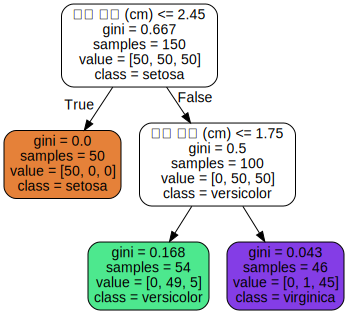

In [35]:
graph = graphviz.Source(dot_data)
graph # 설명 가능한 인공지능 Explainable AI

In [36]:
# 200개의 난수 데이터셋
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [37]:
from sklearn.tree import DecisionTreeRegressor

# 결정트리 회귀 모델
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fig(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [39]:
dot_data = tree.export_graphviz(
        tree_reg,
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

In [40]:
# 파일읽기
import pandas as pd
url = 'titanic.csv'
titanic = pd.read_csv(url)

In [41]:

#    1. PassengerId : 각 승객의 고유 번호
#    2. Survived : 생존 여부(종속 변수)
#        0 = 사망
#        1 = 생존
#    3. Pclass : 객실 등급 - 승객의 사회적, 경제적 지위
#        1st = Upper
#        2nd = Middle
#        3rd = Lower
#    4. Name : 이름
#    5. Sex : 성별
#    6. Age : 나이
#    7. SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수
#    8. Parch : 동반한 Parent(부모) Child(자식)의 수
#    9. Ticket : 티켓의 고유넘버
#    10. Fare : 티켓의 요금
#    11. Cabin : 객실 번호
#    12. Embarked : 승선한 항
#        C = Cherbourg
#        Q = Queenstown
#        S = Southampton

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
titanic.shape

(891, 12)

In [45]:
# 여자:0 남자:1로 변환
titanic.Sex = titanic.Sex.map({'female':0, 'male':1})  # 성별을 숫자값으로 매핑
# 나이 누락된값 median 값으로 채움
titanic.Age.fillna(titanic.Age.median(), inplace=True)

In [46]:
# Embarked 누락값을 S로
titanic.Embarked.fillna('S', inplace=True)
                        #Southampton
# get_dummy 만들기               # feature로 된 값은 받을수없어서 변환                    # 접두사 추가
# S 0 1
# C 0 0
# Q 1 0 로 변환
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked', drop_first=True)
embarked_dummies

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [62]:
# 뒤에 붙여줌
titanic = pd.concat([titanic, embarked_dummies], axis=1)

In [65]:
titanic['S_A'] = titanic.Sex + titanic.Age
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S,Embarked_Q,Embarked_S,Embarked_Q,Embarked_S,S_A
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,1,0,1,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0,0,NaN
2,3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,1,0,1,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,53.1000,C123,S,0,1,0,1,0,1,NaN
4,5,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,373450,8.0500,NaN,S,0,1,0,1,0,1,NaN


In [64]:
titanic.head() #Embarked뒤에	Embarked_Q	Embarked_S 가 생김

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S,Embarked_Q,Embarked_S,Embarked_Q,Embarked_S,S_A
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,1,0,1,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0,0,NaN
2,3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,1,0,1,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,53.1000,C123,S,0,1,0,1,0,1,NaN
4,5,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,373450,8.0500,NaN,S,0,1,0,1,0,1,NaN


In [59]:
#  각 승객의 고유 번호, 성별, 나이 ,승선한 항 Q, S
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']
X = titanic[feature_cols]
# 생존 예측
y = titanic.Survived

In [ ]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(treeclf, out_file=None, 
                         feature_names=feature_cols,
                         class_names=["Survived","Die"],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# ★★★★★★★
# 의사결정에 기여를 많이한 정도                   #  tree 모델에서 feature_importances_
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

In [73]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import VotingClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# make_moons 함수는 초승달 모양 클러스터 두 개 형상의 데이터를 생성
# n_samples : 표본 데이터의 수, 디폴트 100
# noise: 잡음의 크기. 0이면 정확한 반원을 이룸

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [74]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score, precision_score

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42) # n_estimators => tree의 갯수
rnd_clf.fit(X_train, y_train)

predict_result = rnd_clf.predict(X_test)
print(f1_score(y_test, predict_result))
print(accuracy_score(y_test, predict_result))
print(confusion_matrix(y_test, predict_result))
print(recall_score(y_test, predict_result))
print(precision_score(y_test, predict_result))

0.8620689655172413
0.872
[[59  2]
 [14 50]]
0.78125
0.9615384615384616


In [75]:
# Classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Regressor
# weights => 
# n_jobs => 전체 코어를 쓰는것 1(한개), -1(전체)

log_clf = LogisticRegression(solver='liblinear', random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42) # n_estimators => tree의 갯수
svm_clf = SVC(gamma='auto', random_state=42)

#투표기반 분류기
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svc', SVC(gamma='auto', random_state=42))])

In [ ]:
from sklearn.metrics import accuracy_score
# for 문을 이용해서도 -
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    #모델이름, 정확도 출력
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [76]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier

# AdaBoostClassifier는 원본 에이다부스트 알고리즘의 변종인 SAMME와 SAMME.R 알고리즘을 사용
# SAMME.R이 SAMME보다 빠르고 성능도 좋다.
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [ ]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# AdaBoostClassifier는 원본 에이다부스트 알고리즘의 변종인 SAMME와 SAMME.R 알고리즘을 사용
# SAMME.R이 SAMME보다 빠르고 성능도 좋다.
ada_clf = AdaBoostClassifier( DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score,mean_squared_error

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = GradientBoostingClassifier(random_state=1)

param_test = { "n_estimators": range(50, 100, 25),
 "max_depth": [1, 2, 4],
  "learning_rate": [0.0001, 0.001, 0.01, 0.1],
  } 
                                                                #      -1 => cpu 다씀  
Gsearch = GridSearchCV(model, param_grid=param_test, scoring="accuracy", n_jobs=-1, cv=5 )
Gsearch.fit(X_train,y_train)
print(Gsearch.best_params_)

#
import joblib

joblib.dump(Gsearch, './model.pkl') # 트레이닝된 모델을 pkl로 저장한것

loaded_model = joblib.load('./model.pkl')
loaded_model.predict(X_test)


In [77]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

# error float타입으로 inf값으로 초기화.
min_val_error = float("inf")
error_going_up = 0

# n_estimators를 점차 늘릴때
for n_estimators in range(1, 120):
    
    # gbrt.n_estimators 설정
    gbrt.n_estimators = n_estimators
    
    # fitting
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    
    #val_error가 min_val_error보다 작을때
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        # 5번이나 연속으로 큰 에러가 나올때
        if error_going_up == 5:
            break  # 조기 종료
print("n_estimators 몇개일때:", gbrt.n_estimators)
print("MSE:", min_val_error)

In [79]:
import xgboost
xgb_reg = xgboost.XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)
val_error = mean_squared_error(y_val, y_pred)
print("검증 MSE:", val_error)

검증 MSE: 0.11588755477707718


In [81]:
                                                        #early_stopping_rounds 갯수 만큼 성능 향상이 없으면 중단
xgb_reg.fit(X_train, y_train,eval_set=[(X_val, y_val)], early_stopping_rounds=2)
y_pred = xgb_reg.predict(X_val)
val_error = mean_squared_error(y_val, y_pred)
print("검증 MSE:", val_error)

[0]	validation_0-rmse:0.40582
[1]	validation_0-rmse:0.35474
[2]	validation_0-rmse:0.32464
[3]	validation_0-rmse:0.30981
[4]	validation_0-rmse:0.30304
[5]	validation_0-rmse:0.30246
[6]	validation_0-rmse:0.30195
[7]	validation_0-rmse:0.30074
[8]	validation_0-rmse:0.29867
[9]	validation_0-rmse:0.30140
[10]	validation_0-rmse:0.29938
검증 MSE: 0.08920381542915447


In [83]:
from sklearn.ensemble import  StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# base_models 설정
base_models = [
                 ('rf_1', RandomForestClassifier(max_depth=10)), #
                 ('rf_2', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1), #
                   learning_rate=0.1, n_estimators=1000))  #
                ]

# stacking 설정
clf = StackingClassifier(estimators=base_models, final_estimator=GradientBoostingClassifier(max_depth=4, n_estimators=75, random_state=1)) #

clf.fit(X_train,y_train)

StackingClassifier(estimators=[('rf_1', RandomForestClassifier(max_depth=10)),
                               ('rf_2',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                         max_depth=1,
                                                                                         random_state=1),
                                                   learning_rate=0.1,
                                                   n_estimators=1000))],
                   final_estimator=GradientBoostingClassifier(max_depth=4,
                                                              n_estimators=75,
                                                              random_state=1))

In [84]:
!pip install pycaret 
# auto ML 분야에서 쓰이는 오토 머신러닝  라이브러리중 하나

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
 

In [1]:
#pycaret에서 제공하는 'juice' 데이터
from pycaret.datasets import get_data
data = get_data('juice')
data.info()

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1070 non-null   int64  
 1   Purchase        1070 non-null   object 
 2   WeekofPurchase  1070 non-null   int64  
 3   StoreID         1070 non-null   int64  
 4   PriceCH         1070 non-null   float64
 5   PriceMM         1070 non-null   float64
 6   DiscCH          1070 non-null   float64
 7   DiscMM          1070 non-null   float64
 8   SpecialCH       1070 non-null   int64  
 9   SpecialMM       1070 non-null   int64  
 10  LoyalCH         1070 non-null   float64
 11  SalePriceMM     1070 non-null   float64
 12  SalePriceCH     1070 non-null   float64
 13  PriceDiff       1070 non-null   float64
 14  Store7          1070 non-null   object 
 15  PctDiscMM       1070 non-null   float64
 16  PctDiscCH       1070 non-null   float64
 17  ListPriceDiff   1070 non-null   f

In [2]:
from pycaret.datasets import get_data
from pycaret.classification import *
setup_clf = setup(data=data, target='Purchase')

,Description,Value
0,Session id,8173
1,Target,Purchase
2,Target type,Binary
3,Target mapping,"CH: 0, MM: 1"
4,Original data shape,"(1070, 19)"
5,Transformed data shape,"(1070, 19)"
6,Transformed train set shape,"(749, 19)"
7,Transformed test set shape,"(321, 19)"
8,Ordinal features,1
9,Numeric features,17


In [4]:
# ML 모델 성능 비교
top = compare_models()
top

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8305,0.8995,0.7636,0.8034,0.7785,0.6417,0.6466,0.4690
lr,Logistic Regression,0.8278,0.8979,0.7467,0.8055,0.7717,0.6340,0.6385,1.1140
ridge,Ridge Classifier,0.8278,0.0000,0.7569,0.7992,0.7736,0.6352,0.6396,0.3120
gbc,Gradient Boosting Classifier,0.8184,0.8828,0.7566,0.7798,0.7650,0.6173,0.6208,1.2930
ada,Ada Boost Classifier,0.8078,0.8595,0.7191,0.7826,0.7445,0.5913,0.5976,0.9640
lightgbm,Light Gradient Boosting Machine,0.8077,0.8770,0.7567,0.7619,0.7552,0.5974,0.6018,0.3890
rf,Random Forest Classifier,0.8064,0.8783,0.7361,0.7654,0.7461,0.5904,0.5951,1.4920
xgboost,Extreme Gradient Boosting,0.7944,0.8713,0.7498,0.7370,0.7398,0.5703,0.5744,0.3280
et,Extra Trees Classifier,0.7917,0.8597,0.7224,0.7436,0.7291,0.5604,0.5643,1.3560
dt,Decision Tree Classifier,0.7770,0.7706,0.7426,0.7051,0.7210,0.5357,0.5390,0.4050


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [5]:
from pycaret.regression import *
from pycaret.datasets import get_data
dataset = get_data('diamond')
exp = setup(dataset, target='Price')
reg_top = compare_models()
reg_top

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


,Description,Value
0,Session id,1352
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,6


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,676.7304,1937953.4310,1371.2931,0.9810,0.0709,0.0527,0.8840
et,Extra Trees Regressor,752.4373,2480574.4238,1553.6977,0.9757,0.0799,0.0592,2.2290
rf,Random Forest Regressor,744.7578,2703432.6581,1605.1256,0.9733,0.0797,0.0581,1.8800
lightgbm,Light Gradient Boosting Machine,736.8006,2807047.3149,1648.0694,0.9724,0.0758,0.0554,1.1650
gbr,Gradient Boosting Regressor,893.8174,2945783.3386,1709.5535,0.9710,0.1002,0.0761,1.0990
dt,Decision Tree Regressor,982.8227,4888363.0177,2178.8952,0.9520,0.1058,0.0756,0.2680
ridge,Ridge Regression,2467.7799,14277006.4345,3767.8247,0.8615,0.6513,0.2886,0.5040
llar,Lasso Least Angle Regression,2466.9417,14336362.5193,3775.5502,0.8609,0.6509,0.2880,0.3270
lasso,Lasso Regression,2467.3057,14354730.6884,3778.0692,0.8607,0.6514,0.2880,0.4460
lr,Linear Regression,2472.0804,14360465.4276,3778.2449,0.8607,0.6649,0.2889,0.3830


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             objective='reg:squarederror', predictor=None, ...)

In [7]:
from pandas import read_csv

# pycaret classification 모듈
from pycaret.classification import setup

# pycaret classification 모델들을 비교하기 위한 모듈
from pycaret.classification import compare_models

# sonar 데이터셋
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'

# 데이터셋 로드
df = read_csv(url, header=None)
# 컬럼 갯수
n_cols = df.shape[1]

# 컬럼명 String으로 반환
df.columns = [str(i) for i in range(n_cols)]
# 데이터셋 설정
grid = setup(data=df, target=df.columns[-1],  verbose=True)
# 모델 학습
best = compare_models()
# best 모델 확인
print(best)

,Description,Value
0,Session id,7157
1,Target,60
2,Target type,Binary
3,Target mapping,"M: 0, R: 1"
4,Original data shape,"(208, 61)"
5,Transformed data shape,"(208, 61)"
6,Transformed train set shape,"(145, 61)"
7,Transformed test set shape,"(63, 61)"
8,Numeric features,60
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8686,0.9296,0.7952,0.9223,0.8477,0.7339,0.7479,0.6070
lightgbm,Light Gradient Boosting Machine,0.8424,0.8928,0.8119,0.8617,0.8239,0.6833,0.6997,0.3340
xgboost,Extreme Gradient Boosting,0.8019,0.8812,0.7833,0.8060,0.7869,0.6031,0.6145,0.2980
rf,Random Forest Classifier,0.7814,0.8629,0.6833,0.8314,0.7442,0.5585,0.5725,0.7890
gbc,Gradient Boosting Classifier,0.7676,0.8585,0.7119,0.7925,0.7392,0.5322,0.5441,0.6460
lr,Logistic Regression,0.7600,0.8222,0.7238,0.7731,0.7331,0.5178,0.5362,0.1760
ridge,Ridge Classifier,0.7600,0.0000,0.7381,0.7548,0.7354,0.5176,0.5304,0.1210
ada,Ada Boost Classifier,0.7590,0.8295,0.7119,0.7770,0.7328,0.5166,0.5272,0.4480
knn,K Neighbors Classifier,0.7329,0.7968,0.5905,0.7694,0.6542,0.4535,0.4719,0.2370
svm,SVM - Linear Kernel,0.7229,0.0000,0.8429,0.6826,0.7367,0.4598,0.4955,0.1900


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=7157, verbose=0, warm_start=False)


In [11]:
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
# MAPE 
def mean_absolute_percentage_error(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# 탐색 대상 함수 (XGBRegressor)
def XGB_cv(max_depth,learning_rate, n_estimators):

    # 모델 정의
    model = xgb.XGBRegressor(max_depth=int(max_depth),
                            learning_rate=learning_rate,
                            n_estimators=int(n_estimators)
                            )
    # 모델 훈련
    model.fit(X_train, y_train)

    # 예측값 출력
    y_pred= model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    # 오차 최적화로 사용할 metric 반환 (베이지안은 이것을 성능수치로 받아들이게됨)
    return r2

In [10]:
#  bayesian-optimization 라이브러리의 BayesianOptimization 클래스 import
from bayes_opt import BayesianOptimization
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 실험해보고자하는 hyperparameter 집합
# max_depth(int, default: 3): 기본 학습자를 위한 최대 트리 깊이
# learning_rate(float, default: 0.1) : Boosting 학습률
# n_estimators(int, default: 100) : fit하기 위한 Boosted tree의 수

pbounds = {'max_depth': (3, 7),
            'learning_rate': (0.001, 0.2),
            'n_estimators': (5000, 10000)
            }

# Bayesian optimization 객체 생성
# f : 탐색 대상 함수, pbounds : hyperparameter 집합
# verbose = 2 항상 출력, verbose = 1 최댓값일 때 출력, verbose = 0 출력 안함
bo=BayesianOptimization(f=XGB_cv, pbounds=pbounds, verbose=2, random_state=1 )    

# 메소드를 이용해 최대화 과정 수행
# init_points :  초기 Random Search 갯수
# n_iter : 반복 횟수 (몇개의 입력값-함숫값 점들을 확인할지! 많을 수록 정확한 값을 얻을 수 있다.)
# acq : Acquisition Function들 중 Expected Improvement(EI) 를 사용
# xi : exploration 강도 (기본값은 0.0)
bo.maximize(init_points=2, n_iter=10, acq='ei', xi=0.01)   # 최고의 하이퍼 파라미터값을 찾아라

# ‘iter’는 반복 회차, ‘target’은 목적 함수의 값, 나머지는 입력값을 나타냄. 
# 현재 회차 이전까지 조사된 함숫값들과 비교하여, 현재 회차에 최댓값이 얻어진 경우, 
# bayesian-optimization 라이브러리는 이를 자동으로 다른 색 글자로 표시하는 것을 확인.

# 찾은 파라미터 값 확인
print(bo.max)


ModuleNotFoundError: ignored